In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/Praful2000/YoutubeLectures/master/classification/HrData.csv')

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [8]:
#Data Exploratory analysis
left=df[df.left==1]
left.shape

(3571, 10)

In [9]:
retained=df[df.left==0]
retained.shape

(11428, 10)

In [10]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Text(0, 0.5, 'left')

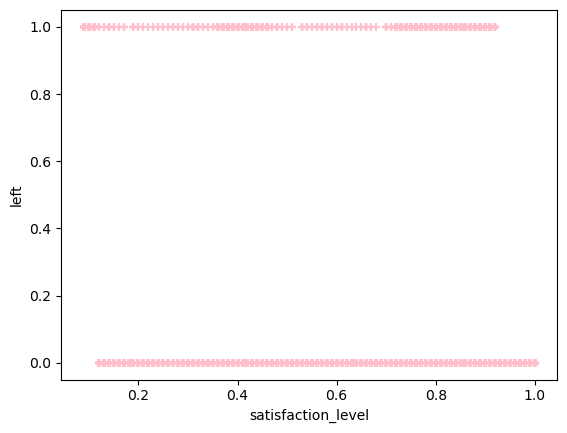

In [11]:
#satisfaction level vs employee retention
plt.scatter(df['satisfaction_level'],df['left'],color='pink',marker='+')
plt.xlabel('satisfaction_level')
plt.ylabel('left')

Text(0, 0.5, 'left')

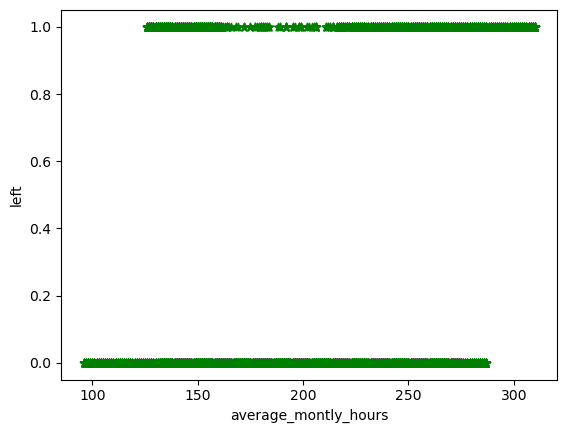

In [12]:
#average monthly hours
plt.scatter(df['average_montly_hours'],df['left'],color='green',marker='*')
plt.xlabel('average_montly_hours')
plt.ylabel('left')

Text(0, 0.5, 'left')

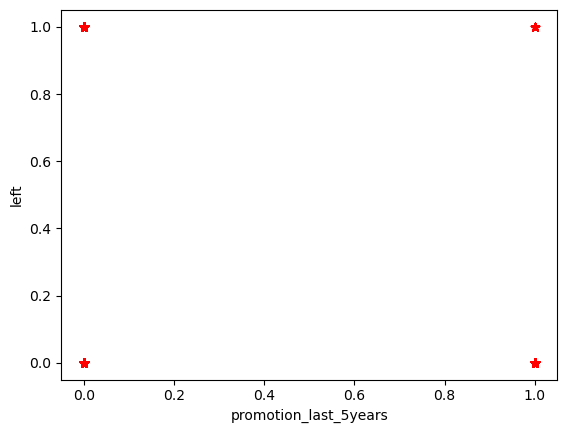

In [13]:
plt.scatter(df['promotion_last_5years'],df['left'],color='red',marker='*')
plt.xlabel('promotion_last_5years')
plt.ylabel('left')

<AxesSubplot:xlabel='salary'>

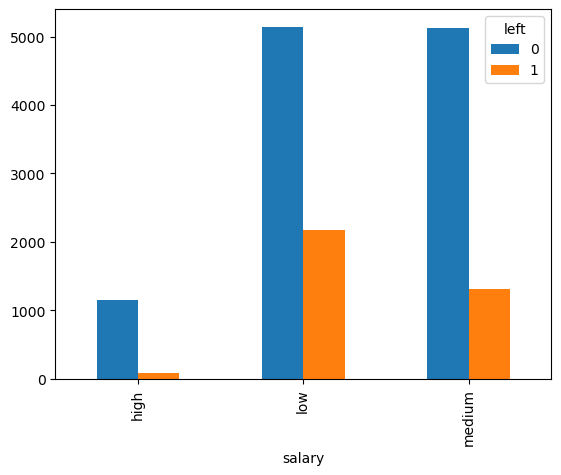

In [14]:
pd.crosstab(df['salary'],df['left']).plot(kind='bar')

<AxesSubplot:xlabel='Department'>

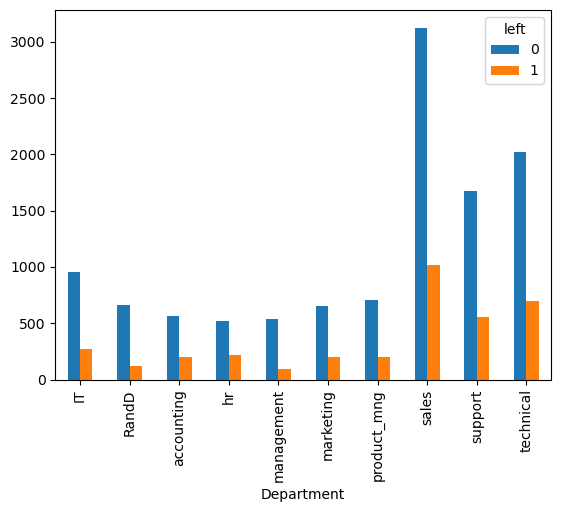

In [15]:
pd.crosstab(df.Department, df.left).plot(kind='bar')

In [22]:
subdf=df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary','number_project']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,number_project
0,0.38,157,0,low,2
1,0.80,262,0,medium,5
2,0.11,272,0,medium,7
3,0.72,223,0,low,5
4,0.37,159,0,low,2


In [24]:
salary_dummies=pd.get_dummies(subdf.salary,prefix="salary")
df_with_dummies=pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,number_project,salary_high,salary_low,salary_medium
0,0.38,157,0,low,2,0,1,0
1,0.80,262,0,medium,5,0,0,1
2,0.11,272,0,medium,7,0,0,1
3,0.72,223,0,low,5,0,1,0
4,0.37,159,0,low,2,0,1,0


In [26]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,number_project,salary_high,salary_low,salary_medium
0,0.38,157,0,2,0,1,0
1,0.80,262,0,5,0,0,1
2,0.11,272,0,7,0,0,1
3,0.72,223,0,5,0,1,0
4,0.37,159,0,2,0,1,0


In [28]:
X=df_with_dummies
X.head()


,satisfaction_level,average_montly_hours,promotion_last_5years,number_project,salary_high,salary_low,salary_medium
0,0.38,157,0,2,0,1,0
1,0.80,262,0,5,0,0,1
2,0.11,272,0,7,0,0,1
3,0.72,223,0,5,0,1,0
4,0.37,159,0,2,0,1,0


In [30]:
y=df.left

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) 

In [33]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [34]:
model.fit(X_train,y_train)

C:\Users\Saurav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [36]:
model.score(X_test,y_test)

0.79